# k近傍法

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [55]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

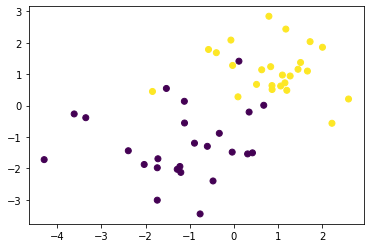

In [56]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

## 学習

陽に訓練ステップはない

## 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

## numpy実装

In [57]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred, n_neighbors):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    # plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, label='$k$ ='+str(n_neighbors))
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.6, levels=np.linspace(0, 1, 3))
    plt.legend()
    plt.show()

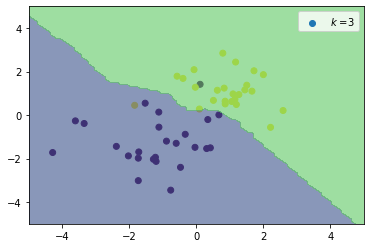

In [58]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred, n_neighbors)

## scikit-learn実装

* Ｋを大きくすると決定境界は滑らかになる事が以下から見てとれる。
 - 分類したい点の近傍からＫ個を取ってきて、それらがももっとも多く所属するクラスに識別される。

In [59]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

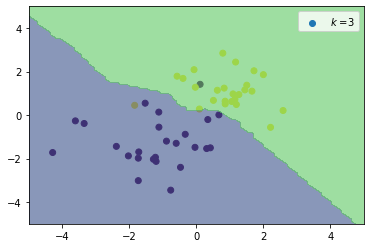

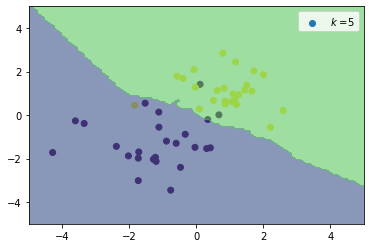

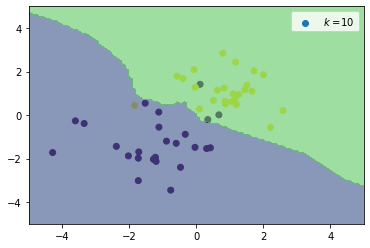

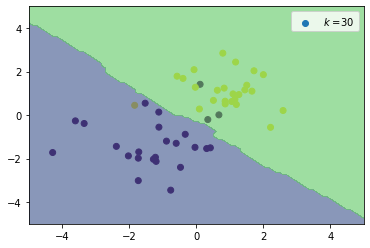

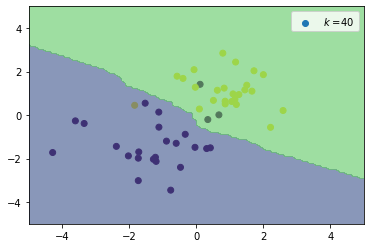

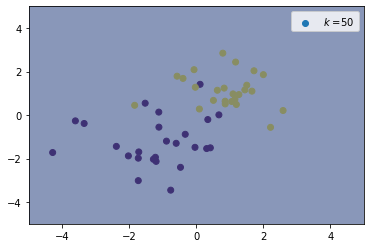

In [60]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in [3, 5, 10, 30, 40, 50]:

    knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
    plt_resut(X_train, ys_train, knc.predict(xx), n_neighbors)